# Calculate optimal 2 by 2 with 30 degree angles

In [12]:
import os
import sys
sys.path.append('../../..')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from metabatt.utils import calculate_beam_lengths, get_input_count
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs
from metabatt.reinforce.agents import QAgentReplayMemory

In [2]:
def add_subgraph(graph, angles, lengths, node_idx, angle_idx, lenght_idx=0):
    subgraph = Subgraphs(angles, lengths, node=graph.get_node(node_idx)).get_subgraph(angles[angle_idx], lengths[lenght_idx])
    graph.add_subgraph_to_node(graph.get_node(node_idx), subgraph)
    
def create_square():
    add_subgraph(graph, angles, lengths, 1, 0, 0)

    add_subgraph(graph, angles, lengths, 0, 1, 0)
    add_subgraph(graph, angles, lengths, 1, 1, 0)

    add_subgraph(graph, angles, lengths, 2, 0, 0)
    add_subgraph(graph, angles, lengths, 3, 0, 0)

    add_subgraph(graph, angles, lengths, 2, 1, 0)
    add_subgraph(graph, angles, lengths, 3, 1, 0)
    
def create_30():   
    add_subgraph(graph, angles, lengths, 0, 0)
    add_subgraph(graph, angles, lengths, 1, 1)

lengths=[1] angles=[0, 90, 180]


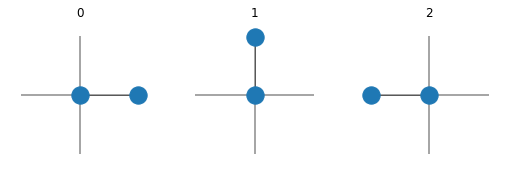

In [3]:
cell_size = [2, 2]
original_angles = [0, 90, 180]
lengths, angles = calculate_beam_lengths(cell_size, original_angles)
lengths, angles = ([1], original_angles)

# we start from scratch here
print(f"{lengths=} {angles=}")

# start by making an empty unit cell
graph = Graph(n_cells_w=3,  # dimension width
              n_cells_h=3,  # dimension height
              node_size=1e-2,
              eps_edge_overlaps=1e-3,
              max_edge_length=1.5, # reduces computational time if known
              pbc=[True, True]) # apply periodic boundary conditions

if not any(node.node_id == 0 for node in graph.nodes): graph.add_node(node_id=0, position=[0.0, 0.0])
if not any(node.node_id == 1 for node in graph.nodes): graph.add_node(node_id=1, position=[1.0, 0.0])
graph.add_edge(Edge(graph.get_node(0), graph.get_node(1), graph))

graph.assign_rotation_to_nodes()
graph.bend_edges()
Subgraphs(angles, lengths, node=graph.get_node(0)).visualize()

2.0


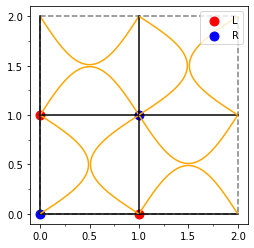

In [4]:
create_square()
print(graph.get_graph_score())
graph.plot()

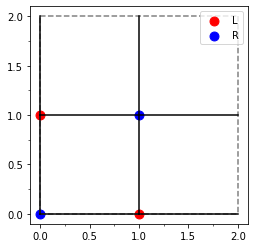

In [6]:
graph = Graph.load_graph_state('90deg')
graph.plot()

In [5]:
graph.add_frustrated_edges()
graph.plot()
print(f"Score with frustrated edges: {graph.get_graph_score()}")

Score with frustrated edges: 2.705


lengths=[1] angles=[0, 30, 90, 150, 180]


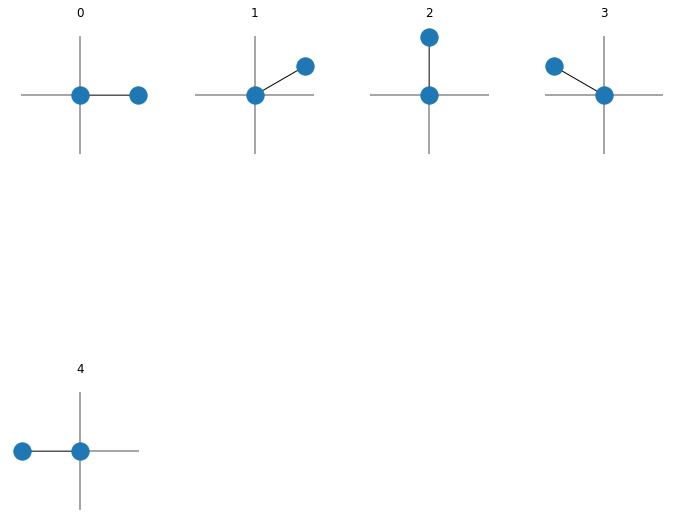

In [4]:
cell_size = [2, 2]
original_angles = [0, 30, 90, 150, 180]
lengths, angles = calculate_beam_lengths(cell_size, original_angles)
lengths, angles = ([1], original_angles)

# we start from scratch here
print(f"{lengths=} {angles=}")

# start by making an empty unit cell
graph = Graph(n_cells_w=3,  # dimension width
              n_cells_h=3,  # dimension height
              node_size=1e-2,
              eps_edge_overlaps=1e-3,
              max_edge_length=1.5, # reduces computational time if known
              pbc=[True, True]) # apply periodic boundary conditions

if not any(node.node_id == 0 for node in graph.nodes): graph.add_node(node_id=0, position=[0.0, 0.0])
if not any(node.node_id == 1 for node in graph.nodes): graph.add_node(node_id=1, position=[1.0, 0.0])
graph.add_edge(Edge(graph.get_node(0), graph.get_node(1), graph))

graph.assign_rotation_to_nodes()
graph.bend_edges()
#Subgraphs(angles, lengths, node=graph.get_node(0)).visualize()

In [5]:
add_subgraph(graph, angles, lengths, 1, 0)
add_subgraph(graph, angles, lengths, 0, 1)
add_subgraph(graph, angles, lengths, 1, 1)

add_subgraph(graph, angles, lengths, 2, 0)
add_subgraph(graph, angles, lengths, 3, 0)
add_subgraph(graph, angles, lengths, 2, 1)
add_subgraph(graph, angles, lengths, 3, 1)

add_subgraph(graph, angles, lengths, 4, 0)
add_subgraph(graph, angles, lengths, 5, 0)
add_subgraph(graph, angles, lengths, 4, 3)
add_subgraph(graph, angles, lengths, 5, 3)

add_subgraph(graph, angles, lengths, 6, 0)
add_subgraph(graph, angles, lengths, 7, 0)
add_subgraph(graph, angles, lengths, 6, 3)
add_subgraph(graph, angles, lengths, 7, 3)



print(graph.get_graph_score())
graph.plot()

4.0


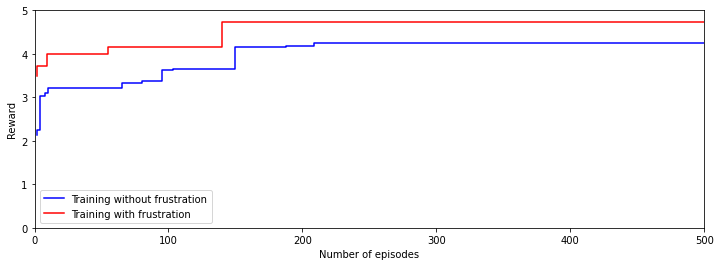

In [41]:
# [2.13, 2.13, 2.2500000000000004, 2.2500000000000004, 3.0300000000000002, 3.0300000000000002, 3.09, 3.09, 3.2199999999999998, 3.2199999999999998, 3.34, 3.34, 3.37, 3.37, 3.62, 3.62, 3.6500000000000004, 3.6500000000000004, 4.150000000000001, 4.150000000000001, 4.180000000000001, 4.180000000000001, 4.240000000000001, 4.240000000000001]
# [3.5, 3.5, 3.7199999999999998, 3.7199999999999998, 4.0, 4.0, 4.155, 4.155, 4.740000000000001, 4.740000000000001]

plt.figure(figsize=(12,4))

xpoints = [2, 2, 2, 4, 4, 8, 8, 10, 10, 65, 65, 80, 80, 95, 95, 103, 103, 150, 150, 188, 188, 209, 209, 500]
ypoints = [2.13, 2.13, 2.25, 2.25, 3.03, 3.03, 3.09, 3.09, 3.22, 3.22, 3.34, 3.34, 3.37, 3.37, 3.62, 3.62, 3.65, 3.65, 4.15, 4.15, 4.18, 4.18, 4.24, 4.24]
plt.plot(xpoints, ypoints, label="Training without frustration", color="blue")

xpoints = [2, 2, 2, 9, 9, 55, 55, 140, 140, 500]
ypoints = [3.5, 3.5, 3.72, 3.72, 4.0, 4.0, 4.155, 4.155, 4.74, 4.74]
plt.plot(xpoints, ypoints, label="Training with frustration", color="red")

class ScalarFormatterForceFormat(ScalarFormatter):
    def _set_format(self,vmin,vmax):  # Override function that finds format to use.
        self.format = "%1.1f"  # Give format here
        

plt.xlim(0, 500)
plt.ylim(0, 5.0)
plt.xlabel("Number of episodes")
plt.ylabel("Reward")
plt.legend()
plt.show()

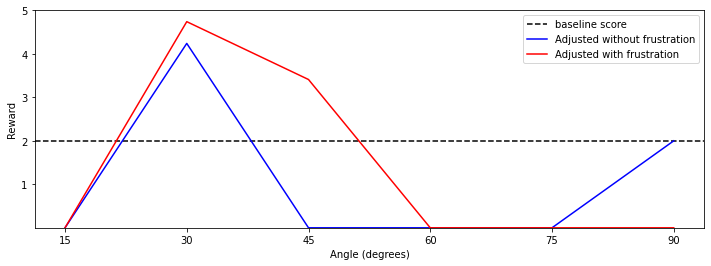

In [9]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()

plt.axhline(y = 2, color = 'black', linestyle = '--', label = "baseline score")
plt.ylim(0, 5.0)

x = [1, 2, 3, 4, 5, 6]

ypoints = [0, 4.24, 0, 0, 0, 2]
ax.plot(x, ypoints, label="Adjusted without frustration", color="blue")

ypoints = [0, 4.74, 3.41, 0, 0, 0]
ax.plot(x, ypoints, label="Adjusted with frustration", color="red")

ax.xaxis.set_ticks(x)
ax.xaxis.set_ticklabels(['15', '30', '45', '60', '75', '90'])

ax.yaxis.set_ticks([1, 2, 3, 4, 5])
#ax.yaxis.set_ticklabels([])


plt.xlabel("Angle (degrees)")
plt.ylabel("Reward")
plt.legend()
plt.show()

In [ ]:
def do_training(lengths, angles, allow_frustrations = False):
    n_inputs = get_input_count(angles)
    # we start from scratch here
    subgraphs = Subgraphs(angles=angles,
                          lengths=lengths)

    # create the environment
    env = MetabattEnvSubgraphs(n_cells_x=3,
                               n_cells_y=3,
                               subgraphs=subgraphs,
                               allow_frustrations=allow_frustrations)

    
    NUM_EPISODES = 500 #15 #500  # this is very little, trained agent uses 500
    # create an agent and set hyperparameters
    agent = QAgentReplayMemory(env=env,
                          n_inputs=n_inputs, # this is the state representation
                          n_outputs=env.action_space.n,
                          max_epsilon=1.0,
                          min_epsilon=0.05,
                          gamma=0.99,  # discounted reward
                          tau=0.01, # target network update rate
                          batch_size=8,#8,  # Experience replay, trained agent uses 64
                          lambda_=-np.log(0.01)/NUM_EPISODES,  # decay for epsilon-greedy
                          replay_memory_capacity=16,#16,  # trained agent uses 1000
                          learning_rate=0.0005,
                          prefill_memory=True,
                          random_actions=False,  # random agent
                          save_best_graph=False)  # save the highest ranking graph state

    # train the agent
    agent.train(num_episodes=NUM_EPISODES)  # also plots results when finished
    
deg_15_inc = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180]

# Angles, adjust, allow_frustration
experiments_to_run = [[deg_15_inc, False, False], [deg_15_inc, False, True], [deg_15_inc, True, False], [deg_15_inc, True, True]]
for experiment_data in experiments_to_run:
    original_angles, adjust, allow_frustration = experiment_data
    
    if adjust:
        lengths, angles = calculate_beam_lengths(cell_size, original_angles)
    else:
        lengths = [1]
        angles = original_angles
        
    do_training(lengths, angles, allow_frustration)